In [278]:
import pandas as pd
import numpy as np
import collections

from operator import truediv
import os

from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random

from datetime import datetime


from wordcloud import WordCloud



import pycountry
import seaborn as sns


#### Reading the files containing all artists with genre and origin

In [2]:
artist= pd.read_csv('total_musicgraph_processed_wiki.csv')


#### Taking only the rows where origin is defined

In [3]:
origin=artist.dropna(subset = ['origin'])
origin.count()
origin=origin['origin']

In [4]:
origin=origin.apply(lambda x: x.lower())
origin=origin.apply(lambda x: x.replace('kingdom of',''))
origin=origin.apply(lambda x: x.replace(' ',''))

origin[origin == 'unitedstatesofamerica'] = 'usa'
origin[origin=='unitedkingdom'] = 'Britain'
origin[origin == 'unitedstates'] = 'usa'
origin[origin == 'u.s.'] = 'usa'

origin=origin.apply(lambda x: x.title())




In [5]:
def createTextFromTokens(text_list):
    text = " ".join(str(x) for x in text_list)
    text = text.replace("\n", " ") 
    return text

In [6]:
all_origin = createTextFromTokens( origin)


In [7]:
wc = WordCloud(max_words=1000, mask=None, stopwords=None, margin=10, width = 800, height = 400,
               random_state=1).generate(all_origin)

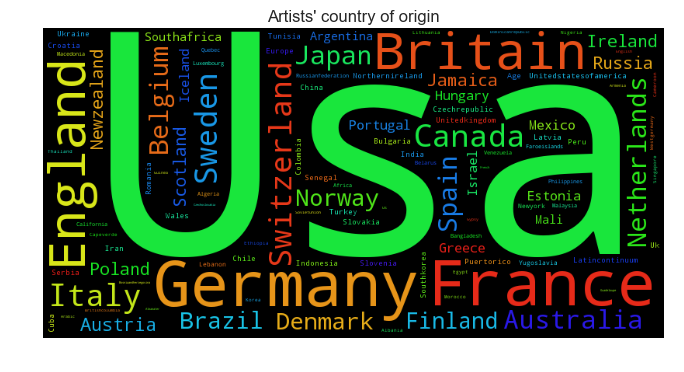

In [8]:
def display_cloud(wc) :
    default_colors = wc.to_array()
    plt.figure()
    plt.title("Artists' country of origin")
    plt.imshow(default_colors)
    plt.axis("off")
    plt.show()
    return

display_cloud(wc)

#### Taking only rows where genre is defined

In [9]:
genre=artist.dropna(subset = ['genre'])
genre=genre['genre']

In [10]:
genre=genre.apply(lambda x: x.lower())
genre=genre.apply(lambda x: x.replace('/',' '))
genre=genre.apply(lambda x: x.replace(',',' '))
genre=genre.apply(lambda x: x.replace('hip hop','HipHop'))



genre=genre.apply(lambda x: x.title())



In [11]:
all_genre = createTextFromTokens(genre)

In [12]:
wc = WordCloud(max_words=1000, mask=None, stopwords=None, margin=10, width = 800, height = 400,
               random_state=1).generate(all_genre)

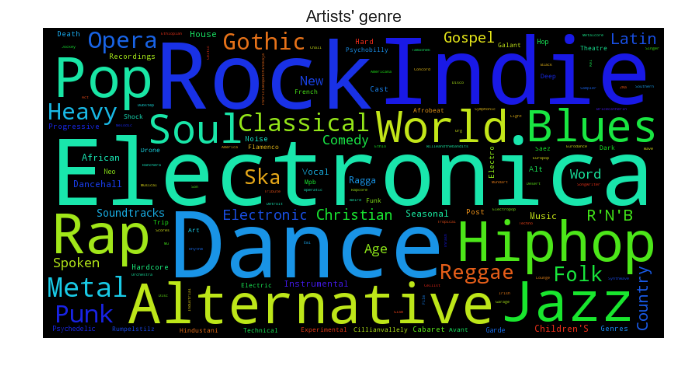

In [13]:
def display_cloud(wc) :
    default_colors = wc.to_array()
    plt.figure()
    plt.title("Artists' genre")
    plt.imshow(default_colors)
    plt.axis("off")
    plt.show()
    return

display_cloud(wc)

# View genre evolution 

In [126]:
total_events = pd.read_csv(os.path.join('total_events.csv'))
total_events.head()


,Unnamed: 0,Artist,City,Genre,Venue,origin
0,1993-05-15,Pino Arduini,Zürich,NaN,Alte Kaserne,NaN
1,1993-05-15,Paul Van Dyk,Zürich,NaN,Alte Kaserne,NaN
2,1993-05-15,Jeff Mills,Zürich,NaN,Alte Kaserne,NaN
3,1993-05-15,Max Durante,Zürich,NaN,Alte Kaserne,NaN
4,1993-05-15,Colin Dale,Zürich,NaN,Alte Kaserne,NaN


In [106]:
events=total_events.dropna(subset = ['Genre'])

In [107]:
events=events.rename(columns={"Unnamed: 0": "date"})

In [108]:
events['year']=events['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)

In [109]:
events= events[['year','Genre']]

In [110]:
events['Genre']=events['Genre'].apply(lambda x: str(x).split(',', 1)[0])

In [151]:
genre=events['Genre']

In [157]:
list_of_genre=genre.value_counts()

In [275]:
number_per_year=events.groupby('year').count()
dict_=number_per_year.to_dict()['Genre']
dict_=collections.OrderedDict(sorted(dict_.items(), key=lambda t: t[0]))
year=list(dict_.keys())
year_number=list(dict_.values())



[9022, 8723, 8552, 8078, 240]

### Taking the 5 first genre

In [170]:
list_of_genre[0:5]

Jazz       8643
Hip Hop    7934
Rock       7251
Pop        4988
Classic    3230
Name: Genre, dtype: int64

In [315]:
jazz=events[genre == 'Jazz'].groupby('year').count()
dict_=jazz.to_dict()['Genre']
dict_=collections.OrderedDict(sorted(dict_.items(), key=lambda t: t[0]))
jazz_year=list(dict_.keys())
jazz_number=list(dict_.values())
jazz_percent=list(map(truediv, jazz_number, year_number))
jazz_percent = [x * 100 for x in jazz_percent] 
jazz_percent

[25.892263356240303,
 24.922618365241316,
 24.076239476145929,
 25.080465461747959,
 20.0]

In [316]:
hip_hop=events[genre == 'Hip Hop'].groupby('year').count()
dict_=hip_hop.to_dict()['Genre']
dict_=collections.OrderedDict(sorted(dict_.items(), key=lambda t: t[0]))
hip_hop_year=list(dict_.keys())
hip_hop_number=list(dict_.values())
hip_hop_percent=list(map(truediv, hip_hop_number, year_number))
hip_hop_percent = [x * 100 for x in hip_hop_percent] 
hip_hop_percent

[22.633562403014853,
 21.563682219419924,
 23.73713751169317,
 23.879673186432285,
 21.666666666666668]

In [317]:
Rock=events[genre == 'Rock'].groupby('year').count()
dict_=Rock.to_dict()['Genre']
dict_=collections.OrderedDict(sorted(dict_.items(), key=lambda t: t[0]))
Rock_year=list(dict_.keys())
Rock_number=list(dict_.values())
Rock_percent=list(map(truediv, Rock_number, year_number))
Rock_percent = [x * 100 for x in Rock_percent] 
Rock_percent

[21.791177122589225,
 21.747105353662729,
 20.427970065481759,
 19.68308987373112,
 21.25]

In [318]:
Pop=events[genre == 'Pop'].groupby('year').count()
dict_=Pop.to_dict()['Genre']
dict_=collections.OrderedDict(sorted(dict_.items(), key=lambda t: t[0]))
Pop_year=list(dict_.keys())
Pop_number=list(dict_.values())
Pop_percent=list(map(truediv, Pop_number, year_number))
Pop_percent = [x * 100 for x in Pop_percent] 
Pop_percent

[12.923963644424742,
 15.407543276395735,
 14.031805425631431,
 15.4617479574152,
 12.083333333333334]

In [319]:
Classic=events[genre == 'Classic'].groupby('year').count()
dict_=Classic.to_dict()['Genre']
dict_=collections.OrderedDict(sorted(dict_.items(), key=lambda t: t[0]))
Classic_year=list(dict_.keys())
Classic_number=list(dict_.values())
Classic_percent=list(map(truediv, Classic_number, year_number))
Classic_percent = [x * 100 for x in Classic_percent] 
Classic_percent

[9.0556417645754816,
 8.7813825518743549,
 10.173058933582787,
 9.1606833374597674,
 15.416666666666668]

## Plotting

In [322]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='charlotte.burki', api_key='rOnSP2MxcVVhx8rHGltM')

Rock = go.Scatter(
    x=Rock_year,
    y=Rock_percent,
    fill='tonexty',
    mode= 'none',
    name='Rock'
)

jazz = go.Scatter(
    x=jazz_year,
    y=jazz_percent,
    fill='tonexty',
    mode= 'none',
    name='Jazz'
)


hip_hop = go.Scatter(
    x=hip_hop_year,
    y=hip_hop_percent,
    fill='tonexty',
    mode= 'none',
    name='Hip Hop'
)

Pop = go.Scatter(
    x=Pop_year,
    y=Pop_percent,
    fill='tonexty',
    mode= 'none',
    name='Pop'
)
Classic = go.Scatter(
    x=Classic_year,
    y=Classic_percent,
    fill='tonexty',
    mode= 'none',
    name='Classic'
)
data = [jazz, Rock, hip_hop, Pop, Classic]
py.iplot(data, filename='basic-area-no-bound')


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~charlotte.burki/0 or inside your plot.ly account where it is named 'basic-area-no-bound'


In [342]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='charlotte.burki', api_key='rOnSP2MxcVVhx8rHGltM')


x=Pop_year


# Add data to create cumulative stacked values
y0_stck=jazz_percent
y1_stck=[y0+y1 for y0, y1 in zip(jazz_percent, hip_hop_percent)]
y2_stck=[y0+y1+y2 for y0, y1, y2 in zip(jazz_percent, hip_hop_percent, Rock_percent)]
y3_stck=[y0+y1+y2+y3 for y0, y1, y2,y3 in zip(jazz_percent, hip_hop_percent, Rock_percent,Pop_percent)]
y4_stck=[y0+y1+y2+y3+y4 for y0, y1, y2,y3,y4 in zip(jazz_percent, hip_hop_percent, Rock_percent,Pop_percent, Classic_percent)]




# Make original values strings and add % for hover text
#y0_txt=[str(y0)+'%' for y0 in y0_org]
#y1_txt=[str(y1)+'%' for y1 in y1_org]
#y2_txt=[str(y2)+'%' for y2 in y2_org]

trace0 = go.Scatter(
    x=x,
    y=y0_stck,
    #text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(250, 0, 0)'),
    fill='tonexty',
    name='Jazz'
)
trace1 = go.Scatter(
    x=x,
    y=y1_stck,
    #text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(0, 250, 0)'),
    fill='tonexty',
    name='Hip Hop'
)
trace2 = go.Scatter(
    x=x,
    y=y2_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(0, 0, 250)'),
    fill='tonexty',
    name='Rock'
)

trace3 = go.Scatter(
    x=x,
    y=y3_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(240, 120, 34)'),
    fill='tonexty',
    name='Pop'
)
trace4 = go.Scatter(
    x=x,
    y=y4_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(12, 13, 15)'),
    fill='tonexty',
    name='Classic'
)
layout = go.Layout(

    xaxis=dict(
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1,

    )
    )
data = [trace0, trace1, trace2, trace3, trace4]

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='axes-ticks')

